# Data Processing and Main Features
# 1| QUICK FEATURE ANALYSIS
Loading  the data

In [1]:
# Import necessary libraries 
# #Make sure pandas is installed in environment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the datasets
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')
submission = pd.read_csv('../data/submission.csv')

# Quick overview
print("Train shape:", train.shape)
print("Test shape:", test.shape)
print("\nTrain columns and types:\n", train.dtypes.head())
train.head() # Display first few rows of the train dataset

Train shape: (15391, 76)
Test shape: (3848, 75)

Train columns and types:
 Unnamed: 0           int64
id                   int64
short_name          object
long_name           object
player_positions    object
dtype: object


,Unnamed: 0,id,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
0,0,261358,Y. Sylla,Youssuf Sylla,ST,58,76,525000.0,952.712115,18,...,43,13,19,17,7,6,8,10,7,NaN
1,1,252435,J. Austerfield,Josh Austerfield,"CM, CDM",55,75,350000.0,902.232819,19,...,48,40,48,45,14,8,5,14,11,NaN
2,2,248723,C. Malley,Connor Malley,"CAM, CM",53,66,230000.0,2873.818374,21,...,52,26,23,31,14,8,13,9,6,NaN
3,3,251157,Lee Gwang Yeon,이광연 Gwang Yeon Lee,GK,60,71,475000.0,678.608124,21,...,26,8,14,12,60,60,54,63,61,23.0
4,4,205393,J. Baldwin,Jack Baldwin,CB,63,65,475000.0,1911.674228,28,...,67,62,63,62,11,12,6,11,14,NaN


# 2| DATA PROPERTIES

In [2]:

# 1. Dimensions
print(f"📐 Train shape: {train.shape}")
print(f"📐 Test shape: {test.shape}")

# 2. Data types summary
dtype_counts = train.dtypes.value_counts()
dtype_df = pd.DataFrame(dtype_counts, columns=['Count']).reset_index()
dtype_df.columns = ['Data Type', 'Count']
print("\n📊 Data Type Summary in Train Set:")
print(dtype_df)

# 3. Full list of columns by type
float_cols = train.select_dtypes(include='float').columns.tolist()
int_cols = train.select_dtypes(include='int').columns.tolist()
object_cols = train.select_dtypes(include='object').columns.tolist()
print(f"\n Number of float columns: {len(float_cols)}")
print(f" Number of int columns: {len(int_cols)}")
print(f" Number of object columns: {len(object_cols)}") 

dtype_list_table = pd.DataFrame({
    "Float Features": pd.Series(float_cols),
    "Int Features": pd.Series(int_cols),
    "Object Features (Categorical)": pd.Series(object_cols)
})
print("\n Table of Features by Data Type:")
print(dtype_list_table)

# 4. Define categorical vs numerical
categorical_features = object_cols
numerical_features = float_cols + int_cols
print(f"\n Number of Numerical Features: {len(numerical_features)}")
print(f" Number of Categorical Features: {len(categorical_features)}")

cat_num_df = pd.DataFrame({
    "Categorical Features": pd.Series(categorical_features),
    "Numerical Features": pd.Series(numerical_features)
})
print("\n🧮 Categorical vs Numerical Features:")
print(cat_num_df)


📐 Train shape: (15391, 76)
📐 Test shape: (3848, 75)

📊 Data Type Summary in Train Set:
Empty DataFrame
Columns: [Data Type, Count]
Index: []

 Number of float columns: 15
 Number of int columns: 45
 Number of object columns: 16

 Table of Features by Data Type:
               Float Features                 Int Features  \
0                   value_eur                   Unnamed: 0   
1                    wage_eur                           id   
2                club_team_id                      overall   
3                league_level                    potential   
4          club_jersey_number                          age   
5   club_contract_valid_until                    height_cm   
6        nation_jersey_number                    weight_kg   
7          release_clause_eur               nationality_id   
8                        pace                    weak_foot   
9                    shooting                  skill_moves   
10                    passing     international_reputati

---
---

# 3| DATA CLEANING PROCEDURES

# 3.1| Checking missing values

We define a function which summarizes:
* how many missing values each column has
* what % of data is missing
* only columns with missing values are shown
* results are sorted from worst to best

We check both Train and Test datasets, and merge the results for easy comparison.

In [3]:
# Function to summarize missing values
def missing_summary(df, dataset_name="Dataset"):
    total = df.isnull().sum()
    percent = (total / len(df)) * 100
    missing_table = pd.concat([total, percent], axis=1)
    missing_table.columns = [f'Missing Values ({dataset_name})', f'% Missing ({dataset_name})']
    missing_table = missing_table[missing_table[f'Missing Values ({dataset_name})'] > 0]
    return missing_table.sort_values(f'% Missing ({dataset_name})', ascending=False)

# Summarizing missing values for train and test
missing_train = missing_summary(train, "Train")
missing_test = missing_summary(test, "Test")

# Merging both summaries together
missing_values = missing_train.merge(missing_test, how='outer', left_index=True, right_index=True)

# Sorting the missing values table
missing_values = missing_values.sort_values(by='% Missing (Train)', ascending=False)

# Display missing values table
missing_values

,Missing Values (Train),% Missing (Train),Missing Values (Test),% Missing (Test)
nation_position,14786,96.069131,3694.0,95.997921
nation_jersey_number,14786,96.069131,3694.0,95.997921
club_loaned_from,14515,94.308362,3622.0,94.126819
player_tags,14231,92.463128,3567.0,92.697505
goalkeeping_speed,13662,88.766162,3445.0,89.527027
player_traits,7936,51.562602,1905.0,49.506237
dribbling,1729,11.233838,403.0,10.472973
shooting,1729,11.233838,403.0,10.472973
passing,1729,11.233838,403.0,10.472973
physic,1729,11.233838,403.0,10.472973


---
# 3.2| Planning the Cleaning Strategy

After analyzing the missing values, we decided cleaning actions based on two criteria:
- percentage of missing values;
- importance of each column for predicting player market value

Actions applied:
* DROP columns with too many missing values (>50%) -> if they are not critical 
* FILL missing values in numerical columns -> using median to avoid influence from outliers
* FILL missing values in categorical columns -> with 'unknown'

In [4]:
# Columns to drop
columns_to_drop = [
    'player_traits', 'player_tags', 'club_loaned_from', 'nation_jersey_number', 
    'nation_position', 'goal_keeping_speed']

# Numerical Columns to Fill with Median
numerical_cols = [
    'release_clause_eur', 'defending', 'dribbling', 'pace',
    'passing', 'physic', 'shooting', 'wage_eur']
# (Exclude club_jersey_number: not relevant)

# Categorical Columns to Fill with 'Unknown'
categorical_cols = [
    'club_name', 'club_position', 'league_name', 'club_contract_valid_until']

---
# 3.3| Applying the Cleaning

In [5]:
# 1. DROP columns -> too many missing values + not critical for predicting market value
train.drop(columns=columns_to_drop, inplace=True, errors='ignore')
test.drop(columns=columns_to_drop, inplace=True, errors='ignore')
# Quick check : dropped columns
print("Dropped columns from train:", columns_to_drop)
print("Dropped columns from test:", columns_to_drop)

# 2. FILL numerical columns -> with median
for column in numerical_cols: 
    median_value = train[column].median()
    train[column] = train[column].fillna(median_value)
    test[column] = test[column].fillna(median_value)
# Quick check: filled numerical columns
print("Train numerical columns after filling:", train[numerical_cols].isnull().sum())
print("Test numerical columns after filling:", test[numerical_cols].isnull().sum())

# 3. FILL categorical columns -> with 'Unknown'
for column in categorical_cols:
    train[column] = train[column].fillna('Unknown')
    test[column] = test[column].fillna('Unknown')   
# Quick check: filled categorical columns
print("Train categorical columns after filling:", train[categorical_cols].isnull().sum())
print("Test categorical columns after filling:", test[categorical_cols].isnull().sum())

#4. FILL remaining missing values -> with 'Unknown'
train.fillna('Unknown', inplace=True)
test.fillna('Unknown', inplace=True)
# Last check: filled remaining missing values
print("Remaining missing values in train:", train.isnull().sum().sum())
print("Remaining missing values in test:", test.isnull().sum().sum())

Dropped columns from train: ['player_traits', 'player_tags', 'club_loaned_from', 'nation_jersey_number', 'nation_position', 'goal_keeping_speed']
Dropped columns from test: ['player_traits', 'player_tags', 'club_loaned_from', 'nation_jersey_number', 'nation_position', 'goal_keeping_speed']
Train numerical columns after filling: release_clause_eur    0
defending             0
dribbling             0
pace                  0
passing               0
physic                0
shooting              0
wage_eur              0
dtype: int64
Test numerical columns after filling: release_clause_eur    0
defending             0
dribbling             0
pace                  0
passing               0
physic                0
shooting              0
wage_eur              0
dtype: int64
Train categorical columns after filling: club_name                    0
club_position                0
league_name                  0
club_contract_valid_until    0
dtype: int64
Test categorical columns after filling: club

C:\Users\Albin\AppData\Local\Temp\ipykernel_28412\163426028.py:26: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  train.fillna('Unknown', inplace=True)
C:\Users\Albin\AppData\Local\Temp\ipykernel_28412\163426028.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  test.fillna('Unknown', inplace=True)


---
# 3.4| Checking database Consistency

Before training a model, we need to make sure that the train and test datasets have the same structure.

We need to take into account that the train set contains the target column 'value_eur', while the test set does not because we still need to predict it. So we temporarily drop this column from the train set before comparing

In [57]:
train_features = train.drop(columns=['value_eur']) 

# Checking if train and test datasets have the same columns
train_columns = set(train_features.columns)
test_columns = set(test.columns)

if train_columns != test_columns:
    print("Mismatch in columns between train and test datasets:")
    print("Columns in train but not in test:", train_columns - test_columns)
    print("Columns in test but not in train:", test_columns - train_columns)
else:
    print("Train and test datasets have the same columns.")

Train and test datasets have the same columns.


---
# 3.5| Final Checks


In [58]:
# Checking for unexpected missing values
missing_train = train.isnull().sum()[train.isnull().sum() > 0]
if missing_train.empty:
    print("No unexpected missing values in train dataset. ")
else:
    print(missing_train)

missing_test = test.isnull().sum()[test.isnull().sum() > 0]
if missing_test.empty:
    print("No unexpected missing values in test dataset. ")
else:
    print(missing_test)

No unexpected missing values in train dataset. 
No unexpected missing values in test dataset. 


---
# 3.6| RECAP
This data cleaning process helped us to make sure that the datasets are consistent and ready for modelling. 

We addressed missing values by dropping irrelevant columns, properly filling missing values , and verifying that the train and test datasets have matching structures. 

With the data now cleaned and organized, we're ready to build and evaluate predictive models.

---
---
# 4| KEY FEATURES 

Before building predictive models, we need to better understand:
* how data is distributed
* how different features relate to each other 
* which might be the most important feature for predicting a player's market value

This early analysis helps us decide which features might be most useful for modeling.


# 4.1| Distribution of key features 

We started by plotting histograms of some important features such as age, rating, potential, and wage. 

This analysis provides insights into:
 - The range and spread of the data -> variability in player attributes
 - Presence of outliers -> special handling of extreme values
 - Skewness or symmetry of the data -> determining if transformations are needed

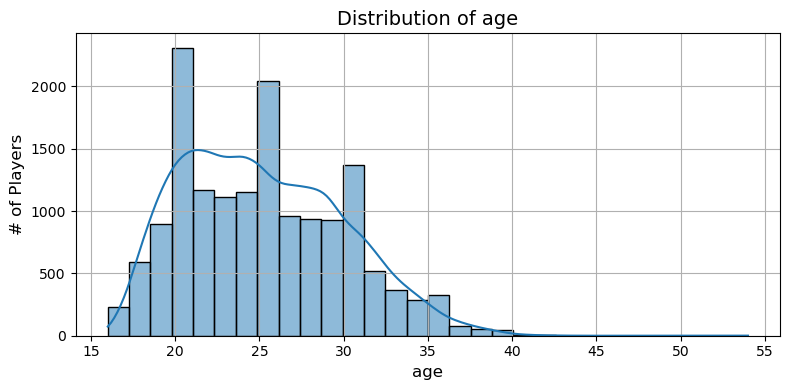

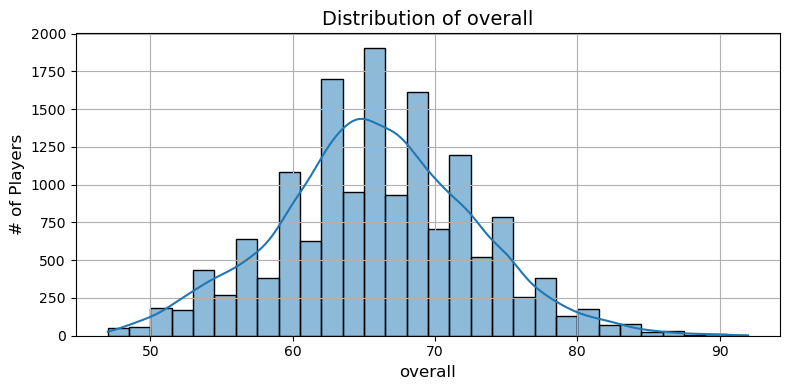

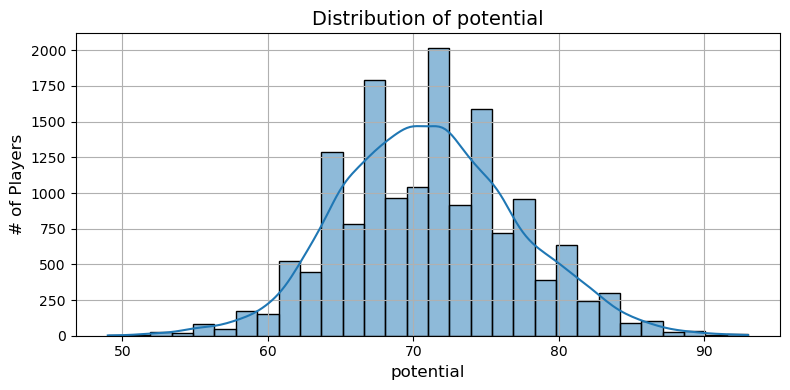

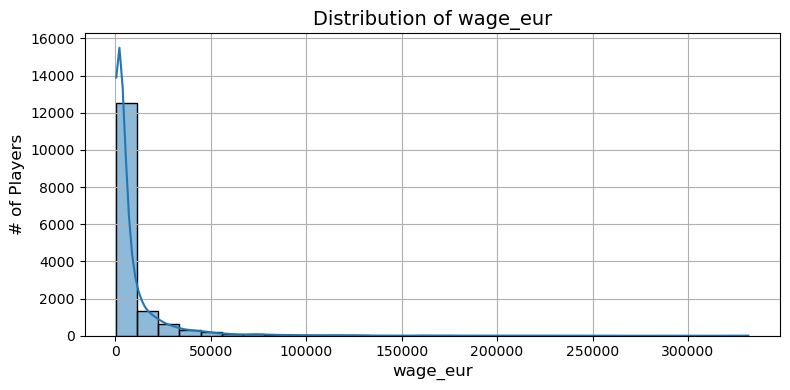

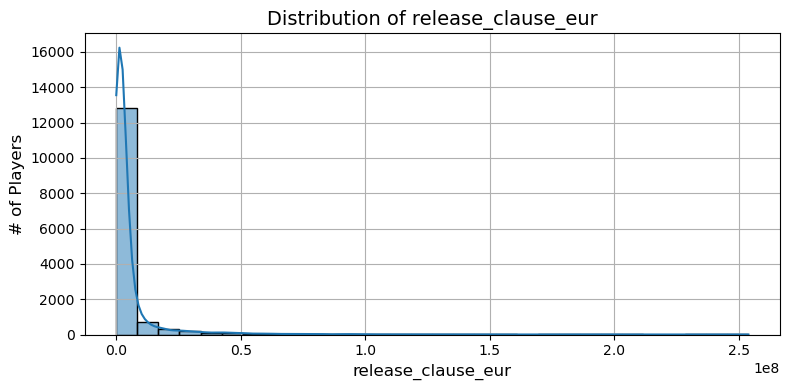

In [59]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
train = pd.read_csv('../data/train.csv')# Load the dataset

# Define the key features to visualize
# These features are chosen based on their relevance to player performance and market value
features = ['age', 'overall', 'potential', 'wage_eur', 'release_clause_eur']

# Plot histograms for each feature
for f in features:
    plt.figure(figsize=(8, 4)) 
    sns.histplot(data=train, x=f, kde=True, bins=30)  # Plot histogram with KDE (smooth curve)
    plt.title(f'Distribution of {f}', fontsize=14) 
    plt.xlabel(f, fontsize=12)  
    plt.ylabel('# of Players', fontsize=12)  
    plt.grid(True)  
    plt.tight_layout()  
    plt.show() 

### Distribution Summary Table

| Feature        | Main Range         | Peak (Most Frequent) | Shape        | Outliers / Comments                                 |
|-----------------|---------------------|----------------------|--------------|-----------------------------------------------------|
| Age             | 18–25 years         | 20–21 years           | Right-skewed | Few players >35 years old, rare extreme values to 50 |
| Overall         | 60–80 ratings       | 62–75 ratings         | Symmetrical  | Few very high-rated players (>85)                   |
| Potential       | 65–85 ratings       | 72–74 ratings         | Symmetrical  | Some players have potential >90, rare           |
| Wage (wage_eur) | 0–100K euros/week   | 0–20K euros/week      | Highly right-skewed | Few players earning >100K euros/week              |
| Release Clause (release_clause_eur) | 0–50M euros        | 0–10M euros          | Highly right-skewed | Very few players with very high release clauses (>50M) |


---
# 4.2| Boxplot analysis 

After analyzing the general distribution of the main features using histograms, we now employ boxplots to :
* Gain deeper insights into the data spread;
* Identify potential outliers; 
* Observe the central tendency of each feature.



In [60]:
# Key features
features = ['age', 'overall', 'potential', 'wage_eur', 'release_clause_eur']
train[features].describe().T

,count,mean,std,min,25%,50%,75%,max
age,15391.0,2.521090e+01,4.753887e+00,16.000000,21.000000,2.500000e+01,2.900000e+01,5.400000e+01
overall,15391.0,6.576987e+01,6.890025e+00,47.000000,61.000000,6.600000e+01,7.000000e+01,9.200000e+01
potential,15391.0,7.108622e+01,6.112911e+00,49.000000,67.000000,7.100000e+01,7.500000e+01,9.300000e+01
wage_eur,15342.0,8.610310e+03,1.855964e+04,456.558174,947.936111,2.841617e+03,7.683740e+03,3.316805e+05
release_clause_eur,14457.0,5.367525e+06,1.478709e+07,16000.000000,798000.000000,1.600000e+06,3.600000e+06,2.539000e+08


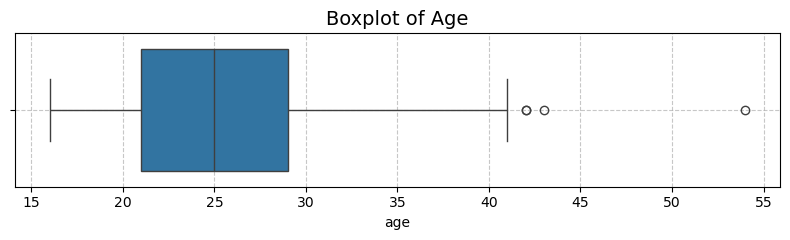

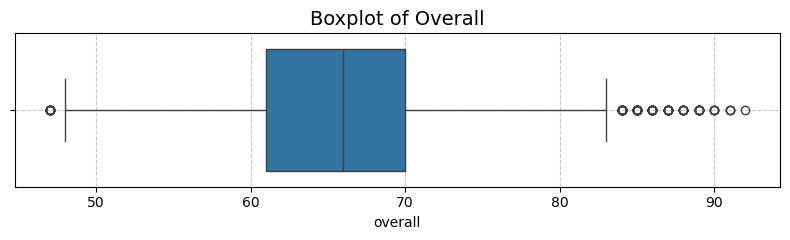

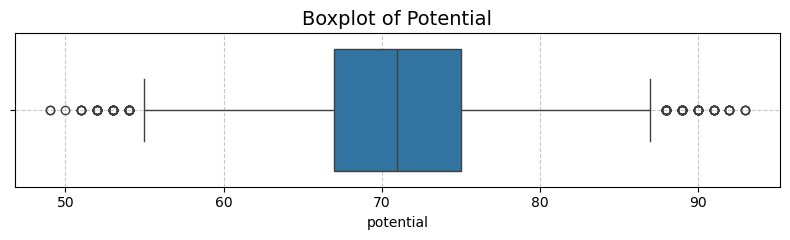

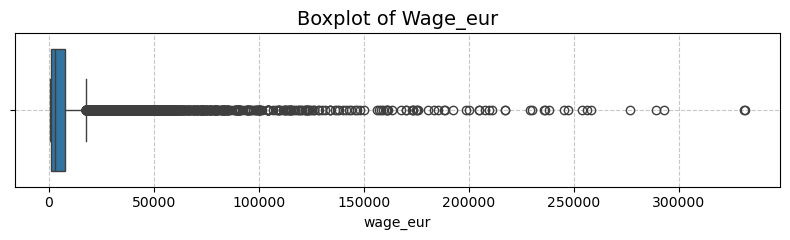

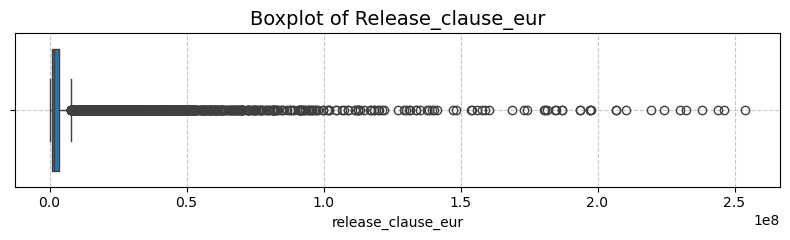

In [61]:
# Plot boxplots
for f in features:
    plt.figure(figsize=(8, 2.5))
    sns.boxplot(data=train, x=f)
    plt.title(f'Boxplot of {f.capitalize()}', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

### Boxplot Summary Table

| Feature              | Median (approx.) | Spread (IQR)             | Outliers Observed?         | Comments |
|----------------------|------------------|---------------------------|-----------------------------|----------|
| Age                  | ~22 years         | 20–25 years               | Few players >35 years        | Young dataset, rare very old players |
| Overall              | ~70 rating        | 65–75 ratings             | Few outliers >85             | Most players are in mid ratings |
| Potential            | ~75 rating        | 70–80 ratings             | Some outliers >90            | Some very high potential players exist |
| Wage (wage_eur)      | ~10K €/week        | 0–20K €/week              | Strong outliers >100K €/week | Few superstars earn massive wages |
| Release Clause (release_clause_eur) | ~5M €            | 0–10M €                  | Some extreme values >50M €   | Few players have huge release clauses |

---
---

# 5| CORRELATION MATRIX WITH 'value_eur' 

In [62]:
print(train.columns.tolist()) #Current Train features 

['Unnamed: 0', 'id', 'short_name', 'long_name', 'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur', 'age', 'dob', 'height_cm', 'weight_kg', 'club_team_id', 'club_name', 'league_name', 'league_level', 'club_position', 'club_jersey_number', 'club_loaned_from', 'club_joined', 'club_contract_valid_until', 'nationality_id', 'nationality_name', 'nation_position', 'nation_jersey_number', 'preferred_foot', 'weak_foot', 'skill_moves', 'international_reputation', 'work_rate', 'body_type', 'release_clause_eur', 'player_tags', 'player_traits', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_


Removing  that don't help predict value_eur — like names, IDs, etc.

| Column Name             | Why Remove?                                                     |
|--------------------------|------------------------------------------------------------------|
| player_id                | Just an ID (no meaning)                                          |
| short_name               | Name text (not useful)                                           |
| long_name                | Name text (not useful)                                           |
| player_face_url          | Image URL (useless for ML)                                       |
| club_logo_url            | Image URL                                                       |
| dob                      | Raw date of birth (could engineer age, but raw date is messy)    |
| nationality_name         | Not helpful directly for skill                                  |
| club_name                | Club name (changes value based on club prestige, but too noisy) |
| club_position            | (optional) depends on what you want                             |
| league_name              | League text (not skill itself)                                  |
| club_contract_valid_until| (optional) can keep or drop                                      |


In [7]:
# Remove unimportant identity columns before correlation
columns_to_remove = [
    'id', 'short_name', 'long_name', 'player_face_url', 
    'club_logo_url', 'dob', 'nationality_name', 
    'club_name', 'league_name', 'club_contract_valid_until'
]

# Drop from train_features
train= train.drop(columns=columns_to_remove, errors='ignore')

print("Remaining columns for correlation:", train.columns.tolist())


Remaining columns for correlation: ['Unnamed: 0', 'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur', 'age', 'height_cm', 'weight_kg', 'club_team_id', 'league_level', 'club_position', 'club_jersey_number', 'club_joined', 'nationality_id', 'preferred_foot', 'weak_foot', 'skill_moves', 'international_reputation', 'work_rate', 'body_type', 'release_clause_eur', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality

# 5.1| Downloading the data set, Train and Test 

In [8]:
# Now lets download after the colums have been removed
train_cleaned = train
all_columns_to_remove = columns_to_drop + columns_to_remove
test_cleaned = test.drop(columns=[col for col in all_columns_to_remove if col in test.columns])

# Save the cleaned dataset to a new CSV file
train_cleaned.to_csv("train_Cleaned.csv", index=False)
test_cleaned.to_csv("test_Cleaned.csv", index=False)
# Dimensions
print(f"📐 Train shape: {train_cleaned.shape}")
print(f"📐 Test shape: {test_cleaned.shape}")


📐 Train shape: (15391, 63)
📐 Test shape: (3848, 62)


In [64]:
print(train['value_eur'].dtype)
print(train['value_eur'].isnull().sum())

float64
58


# 5.2| Correlation among features and features with Value_eur 

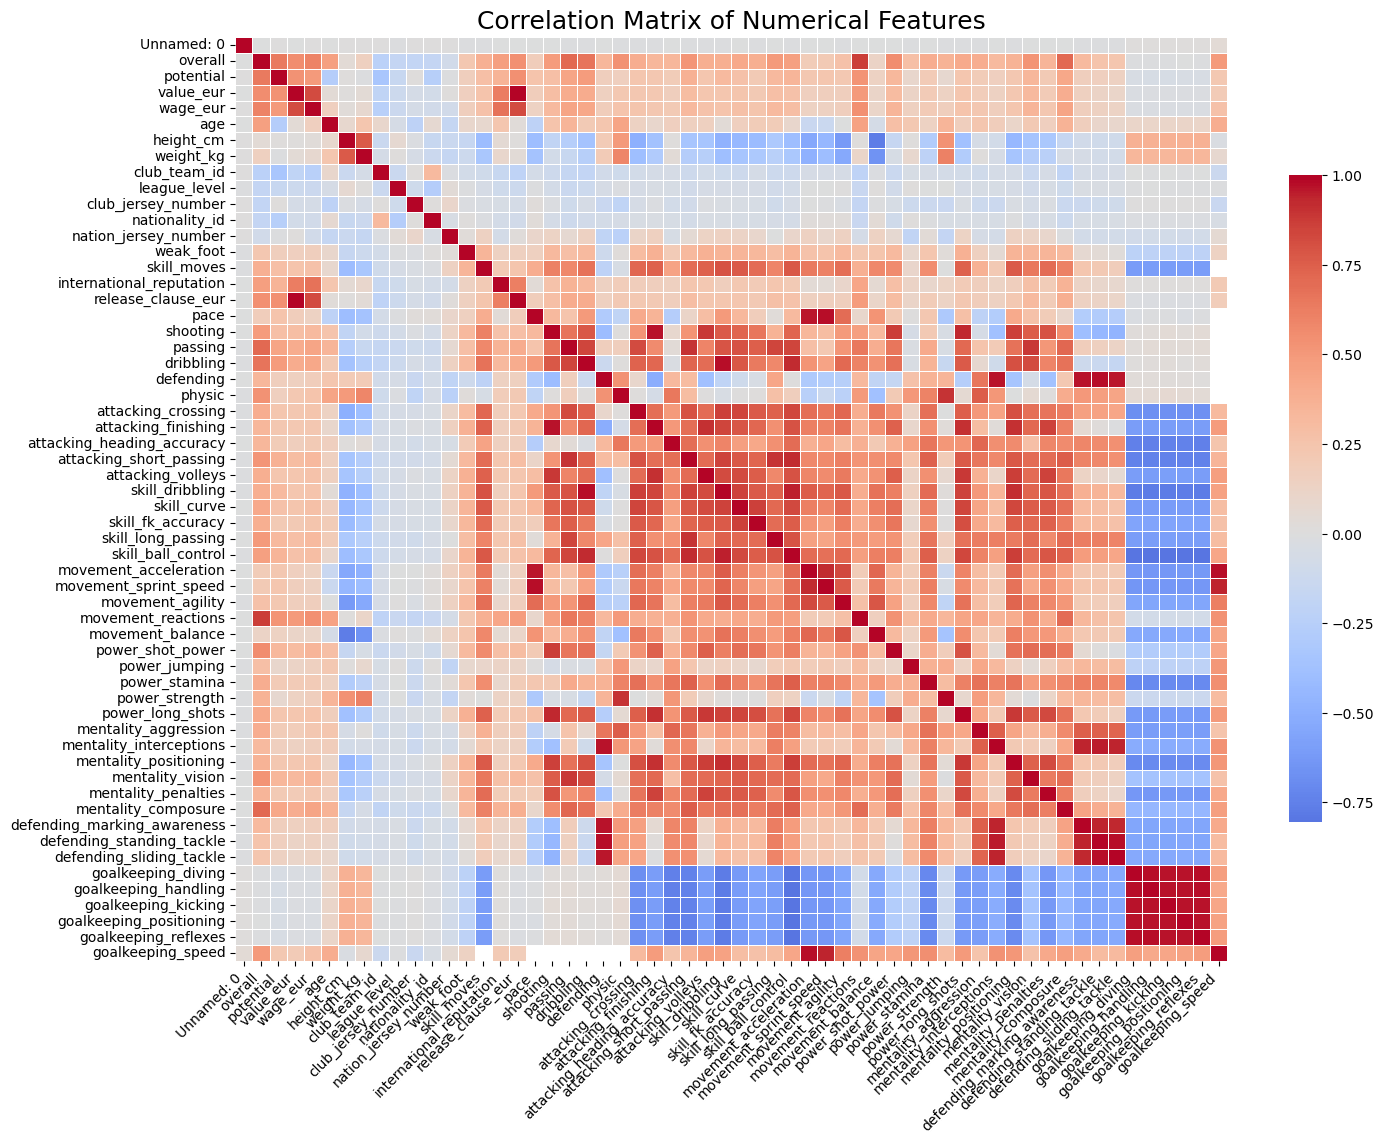

In [65]:
import pandas as pd
import seaborn as sns  #Make sure you have seaborn and Matplot package
import matplotlib.pyplot as plt

# 1. Select only numerical columns (exclude categorical ones)
# Convert value_eur to numeric if needed
train['value_eur'] = pd.to_numeric(train['value_eur'], errors='coerce')
train_numerical = train.select_dtypes(include=['number'])

# 2. Calculate the full correlation matrix
correlations = train_numerical.corr()

# 3. Visualize the full correlation matrix
# 3. Create a better styled heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlations, 
            cmap='coolwarm', 
            center=0, 
            annot=False, 
            fmt='.2f', 
            linewidths=0.5, 
            cbar_kws={'shrink': 0.7})
plt.title('Correlation Matrix of Numerical Features', fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

---

# 5.3| Top 10 Correlated Features with Value_eur 

🔼 Top 10 Positive Correlations with value_eur:

release_clause_eur          0.995313
wage_eur                    0.823054
international_reputation    0.632083
overall                     0.558455
potential                   0.528645
movement_reactions          0.497302
passing                     0.406285
dribbling                   0.405900
mentality_composure         0.392885
mentality_vision            0.324678
Name: value_eur, dtype: float64

🔽 Top 10 Negative Correlations with value_eur:

club_team_id              -0.196912
league_level              -0.119184
nationality_id            -0.084814
club_jersey_number        -0.066140
goalkeeping_diving        -0.023647
goalkeeping_handling      -0.022864
goalkeeping_positioning   -0.022796
goalkeeping_kicking       -0.022064
goalkeeping_reflexes      -0.020494
Unnamed: 0                -0.002039
Name: value_eur, dtype: float64

🔽 Top 10 Absolute Correlations with value_eur:

['release_clause_eur', 'wage_eur', 'international_reputation

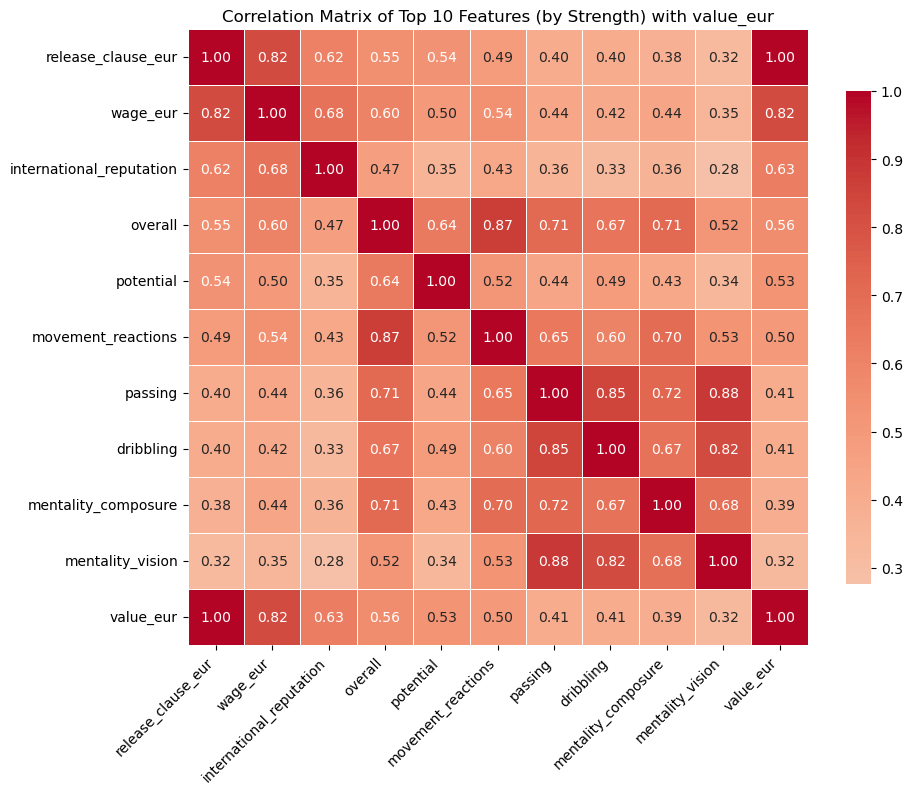

In [66]:
#Find correlation of features with value_eur
value_corr = correlations['value_eur'].drop('value_eur')  # remove self-correlation

# Top 10 positively correlated features
top10_pos = value_corr.sort_values(ascending=False).head(10) 

# Top 10 negatively correlated features
top10_neg = value_corr.sort_values(ascending=True).head(10)

# Display
print("🔼 Top 10 Positive Correlations with value_eur:\n")
print(top10_pos)

print("\n🔽 Top 10 Negative Correlations with value_eur:\n")
print(top10_neg)

# Get Top 10 strongest correlations (positive OR negative) Using absolute 
top10_features = value_corr.abs().sort_values(ascending=False).head(10).index.tolist()
print("\n🔽 Top 10 Absolute Correlations with value_eur:\n")
print(top10_features)
# Create a correlation matrix of these 10 + value_eur
selected_features = top10_features + ['value_eur']
top10_corr_matrix = train_numerical[selected_features].corr()

# Plot heatmap among the top 10 to check for multicorrelation
plt.figure(figsize=(10, 8))
sns.heatmap(top10_corr_matrix,
            cmap='coolwarm',
            center=0,
            annot=True,
            fmt='.2f',
            linewidths=0.5,
            cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix of Top 10 Features (by Strength) with value_eur')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

---

# 5.4|  Small Analysis on Correlation

From the full correlation matrix, we selected the Top 10 features most correlated with the target variable `value_eur`.

These features are highly informative and should be prioritized in model training, as they have a strong direct relationship with the player's market value.

However, when analyzing the focused heatmap, we notice that some of these top features are also highly correlated with each other. 
This situation is called **multicollinearity**, and it can cause problems for linear models by making coefficient estimates unstable.

✅ For tree-based models (e.g., Random Forest, XGBoost), multicollinearity is less of a problem.

⚠️ If we use linear models (e.g., Linear Regression), we might need to:
- Remove one of two highly correlated features
- Apply regularization (like Lasso Regression)

In conclusion, the Top 10 correlated features are a strong base for building predictive models, but careful selection or model choice is needed to handle possible multicollinearity.

---

# 6| PREPARE FINAL DATASET FOR MODELING 

This heatmap helps identify overlapping signals — features that are highly correlated with each other (r > 0.85) — and informs which ones to drop for a more stable model.


🔍 Top 20 Features Most Correlated with value_eur:
  1. release_clause_eur
  2. wage_eur
  3. international_reputation
  4. overall
  5. potential
  6. movement_reactions
  7. passing
  8. dribbling
  9. mentality_composure
  10. mentality_vision
  11. power_shot_power
  12. attacking_short_passing
  13. shooting
  14. skill_long_passing
  15. skill_ball_control
  16. skill_moves
  17. skill_curve
  18. skill_dribbling
  19. attacking_volleys
  20. power_long_shots


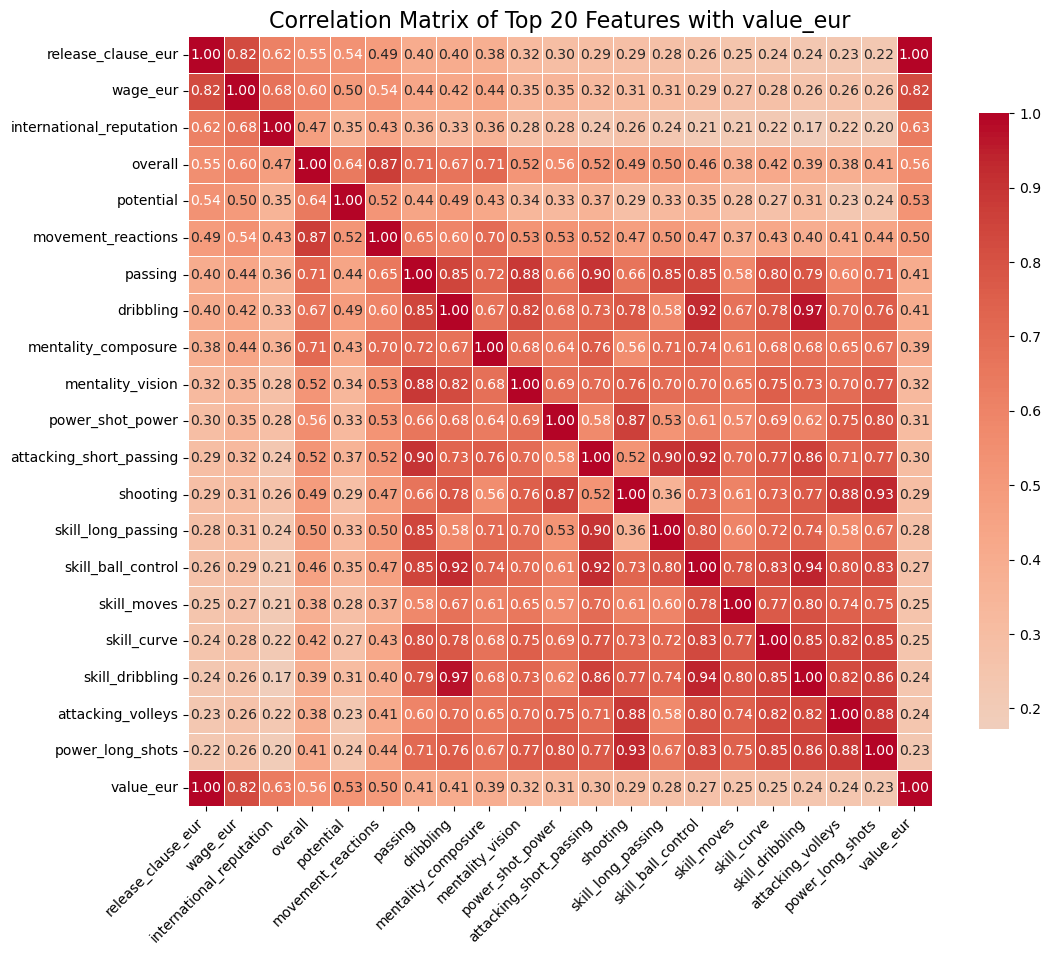


🔗 Highly Correlated Feature Pairs (r > 0.85):
  - overall ↔ movement_reactions  |  Correlation: 0.87
  - passing ↔ mentality_vision  |  Correlation: 0.88
  - passing ↔ attacking_short_passing  |  Correlation: 0.9
  - power_shot_power ↔ shooting  |  Correlation: 0.87
  - attacking_short_passing ↔ skill_long_passing  |  Correlation: 0.9
  - dribbling ↔ skill_ball_control  |  Correlation: 0.92
  - attacking_short_passing ↔ skill_ball_control  |  Correlation: 0.92
  - dribbling ↔ skill_dribbling  |  Correlation: 0.97
  - attacking_short_passing ↔ skill_dribbling  |  Correlation: 0.86
  - skill_ball_control ↔ skill_dribbling  |  Correlation: 0.94
  - skill_curve ↔ skill_dribbling  |  Correlation: 0.85
  - shooting ↔ attacking_volleys  |  Correlation: 0.88
  - shooting ↔ power_long_shots  |  Correlation: 0.93
  - skill_dribbling ↔ power_long_shots  |  Correlation: 0.86
  - attacking_volleys ↔ power_long_shots  |  Correlation: 0.88

✅ Final Features after Removing Multicollinearity:
  1. rel

In [67]:
import numpy as np
# Reselect top 20 absolute correlation with value_eur  
top20_features = value_corr.abs().sort_values(ascending=False).head(20).index.tolist()
print("\n🔍 Top 20 Features Most Correlated with value_eur:")
for i, feat in enumerate(top20_features, 1):
    print(f"  {i}. {feat}")
# Create a correlation matrix of the selected features
corr_matrix = train_numerical[top20_features].corr().abs()

# Add 'value_eur' back for heatmap comparison
top20_plus_value = top20_features + ['value_eur']

# Correlation matrix for heatmap
top20_corr_matrix = train_numerical[top20_plus_value].corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(top20_corr_matrix,
            cmap='coolwarm',
            center=0,
            annot=True,
            fmt='.2f',
            linewidths=0.5,
            cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix of Top 20 Features with value_eur', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

# Keep upper triangle (no duplicates)
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Identify highly correlated pairs (above threshold)
high_corr_pairs = []
for col in upper_triangle.columns:
    for row in upper_triangle.index:
        corr_value = upper_triangle.loc[row, col]
        if pd.notnull(corr_value) and corr_value > 0.85:
            high_corr_pairs.append((row, col, round(corr_value, 2)))

# Print high correlation pairs
print("\n🔗 Highly Correlated Feature Pairs (r > 0.85):")
if high_corr_pairs:
    for row, col, score in high_corr_pairs:
        print(f"  - {row} ↔ {col}  |  Correlation: {score}")
else:
    print("  None found.")

# Remove one feature from each pair (keep the first, drop the second)
redundant_features = {col for _, col, _ in high_corr_pairs}
final_selected_features = [f for f in top20_features if f not in redundant_features]

# Final list of selected features
print("\n✅ Final Features after Removing Multicollinearity:")
for i, feat in enumerate(final_selected_features, 1):
    print(f"  {i}. {feat}")

Define Final X_train, y_train, X_test. The selected features can be picked from the final top 15

In [68]:
# 1. Select Top 10 final features after multicollinearity removal
top10_final_features = final_selected_features[:10]

print("\n📌 Top 10 Final Features for Modeling:")
for i, feat in enumerate(top10_final_features, 1):
    print(f"  {i}. {feat}")

# 2. Define target variable
y_train = train['value_eur']

# 3. Define input features
X_train = train[top10_final_features]

# 4. Prepare test features (same columns)
X_test = test[top10_final_features]



📌 Top 10 Final Features for Modeling:
  1. release_clause_eur
  2. wage_eur
  3. international_reputation
  4. overall
  5. potential
  6. passing
  7. dribbling
  8. mentality_composure
  9. power_shot_power
  10. skill_moves
